In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
import nlpaug.augmenter.word as naw
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from nltk.corpus import stopwords

In [193]:
df = pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [194]:
class_proportions = df['Score'].value_counts(normalize=True)
desired_size = 30000

sampled_df = pd.DataFrame()

for label, proportion in class_proportions.items():
    num_samples = int(desired_size * proportion)
    
    sampled_class_data = df[df['Score'] == label].sample(n=num_samples, random_state=42)
    
    sampled_df = sampled_df.append(sampled_class_data)

sampled_df.reset_index(drop=True, inplace=True)


/var/folders/0g/j3sm95ts7s3ghzdq9pv50qhr0000gn/T/ipykernel_9689/1751848333.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(sampled_class_data)
/var/folders/0g/j3sm95ts7s3ghzdq9pv50qhr0000gn/T/ipykernel_9689/1751848333.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(sampled_class_data)
/var/folders/0g/j3sm95ts7s3ghzdq9pv50qhr0000gn/T/ipykernel_9689/1751848333.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(sampled_class_data)
/var/folders/0g/j3sm95ts7s3ghzdq9pv50qhr0000gn/T/ipykernel_9689/1751848333.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [195]:
sampled_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,414640,B001H0FI36,A2GCL9TTJUIZD7,"cricri ""b769""",1,1,5,1292284800,The only hor chocolate that actually has milk!,Delicious!!! I also own a Keurig machine and a...
1,411152,B000AYFAMO,A1LV6J1MU9TWIG,"April ""Bajo el sol hay bastante lugar para to...",4,4,5,1214092800,Great buy! Great taste!,These fried chik'n cutlets are a huge favorite...
2,268170,B000NY31EU,A18SF2IGTINC6I,Christian Hoffmann,4,5,5,1315699200,$7.09 - you got to be kidding,$7.09 for one piece (as of Sept 2011) can only...
3,521648,B000LKU3DI,A35VJJW05NS0TH,LL,1,1,5,1315440000,Great taste and texture,The teriyaki seitan strips have great smoky/sw...
4,200784,B002VZUW0A,A1N66UDXCT49CY,Derek Damko,0,0,5,1328400000,Sooooooooo good!,We're staying at Stanford's Children's Hospita...
...,...,...,...,...,...,...,...,...,...,...
29993,99285,B0009ETA76,A2WL3PKBV8OWYH,tjaw13,0,1,2,1299369600,Causes stomach problems,It barely gets your milk production up by taki...
29994,290552,B000JZA1VO,AC3VNU8MMAPPZ,"Dave Telford ""kvrdave""",4,16,2,1237507200,Just get it from a vending machine,"Sure it is great candy, but list price of over..."
29995,428539,B002R8J7YS,AI2PFU3E9OMDY,S. Kent,0,6,2,1278288000,"Beware, these are Teensy Tiny Treats",I had to give handfuls to my St. Bernard - the...
29996,404916,B00469PYH0,A1K82R24ROO2I7,"A. Cheffy ""Cheffy""",0,0,2,1331337600,Great price but not great tasting,I should know better than to buy pre-ground co...


In [196]:
sampled_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,29998.000000,29998.000000,29998.000000,29998.000000,2.999800e+04
mean,283620.920895,1.685579,2.162344,4.183246,1.296724e+09
std,163742.854547,6.446392,7.176433,1.310431,4.745695e+07
min,37.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,142601.500000,0.000000,0.000000,4.000000,1.272413e+09
50%,282012.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,425696.500000,2.000000,2.000000,5.000000,1.332806e+09
max,568422.000000,472.000000,477.000000,5.000000,1.351210e+09


In [198]:
sampled_df['Text'] = sampled_df['Text'].fillna('')
sampled_df['length'] = sampled_df['Text'].apply(len)

In [199]:
sampled_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
0,414640,B001H0FI36,A2GCL9TTJUIZD7,"cricri ""b769""",1,1,5,1292284800,The only hor chocolate that actually has milk!,Delicious!!! I also own a Keurig machine and a...,258
1,411152,B000AYFAMO,A1LV6J1MU9TWIG,"April ""Bajo el sol hay bastante lugar para to...",4,4,5,1214092800,Great buy! Great taste!,These fried chik'n cutlets are a huge favorite...,500
2,268170,B000NY31EU,A18SF2IGTINC6I,Christian Hoffmann,4,5,5,1315699200,$7.09 - you got to be kidding,$7.09 for one piece (as of Sept 2011) can only...,178
3,521648,B000LKU3DI,A35VJJW05NS0TH,LL,1,1,5,1315440000,Great taste and texture,The teriyaki seitan strips have great smoky/sw...,451
4,200784,B002VZUW0A,A1N66UDXCT49CY,Derek Damko,0,0,5,1328400000,Sooooooooo good!,We're staying at Stanford's Children's Hospita...,1295
...,...,...,...,...,...,...,...,...,...,...,...
29993,99285,B0009ETA76,A2WL3PKBV8OWYH,tjaw13,0,1,2,1299369600,Causes stomach problems,It barely gets your milk production up by taki...,419
29994,290552,B000JZA1VO,AC3VNU8MMAPPZ,"Dave Telford ""kvrdave""",4,16,2,1237507200,Just get it from a vending machine,"Sure it is great candy, but list price of over...",221
29995,428539,B002R8J7YS,AI2PFU3E9OMDY,S. Kent,0,6,2,1278288000,"Beware, these are Teensy Tiny Treats",I had to give handfuls to my St. Bernard - the...,107
29996,404916,B00469PYH0,A1K82R24ROO2I7,"A. Cheffy ""Cheffy""",0,0,2,1331337600,Great price but not great tasting,I should know better than to buy pre-ground co...,389


([<matplotlib.axis.XTick at 0x7f9ca9ca74f0>,
 [Text(33.0, 0, '33'),
  Text(1054.4444444444443, 0, '1054'),
  Text(2075.8888888888887, 0, '2076'),
  Text(3097.3333333333335, 0, '3097'),
  Text(4118.777777777777, 0, '4119'),
  Text(5140.222222222223, 0, '5140'),
  Text(6161.666666666667, 0, '6162'),
  Text(7183.111111111111, 0, '7183'),
  Text(8204.555555555555, 0, '8205'),
  Text(9226.0, 0, '9226')])

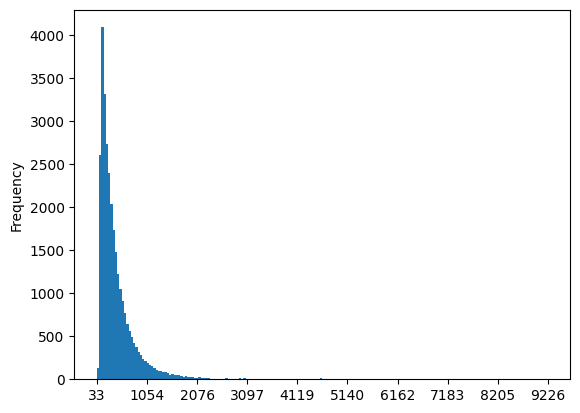

In [200]:
sampled_df['length'].plot(bins = 200, kind = 'hist')

num_ticks = 10 
plt.xticks(
    np.linspace(sampled_df['length'].min(), sampled_df['length'].max(), num_ticks),
    [f"{x:.0f}" for x in np.linspace(sampled_df['length'].min(), sampled_df['length'].max(), num_ticks)]
)


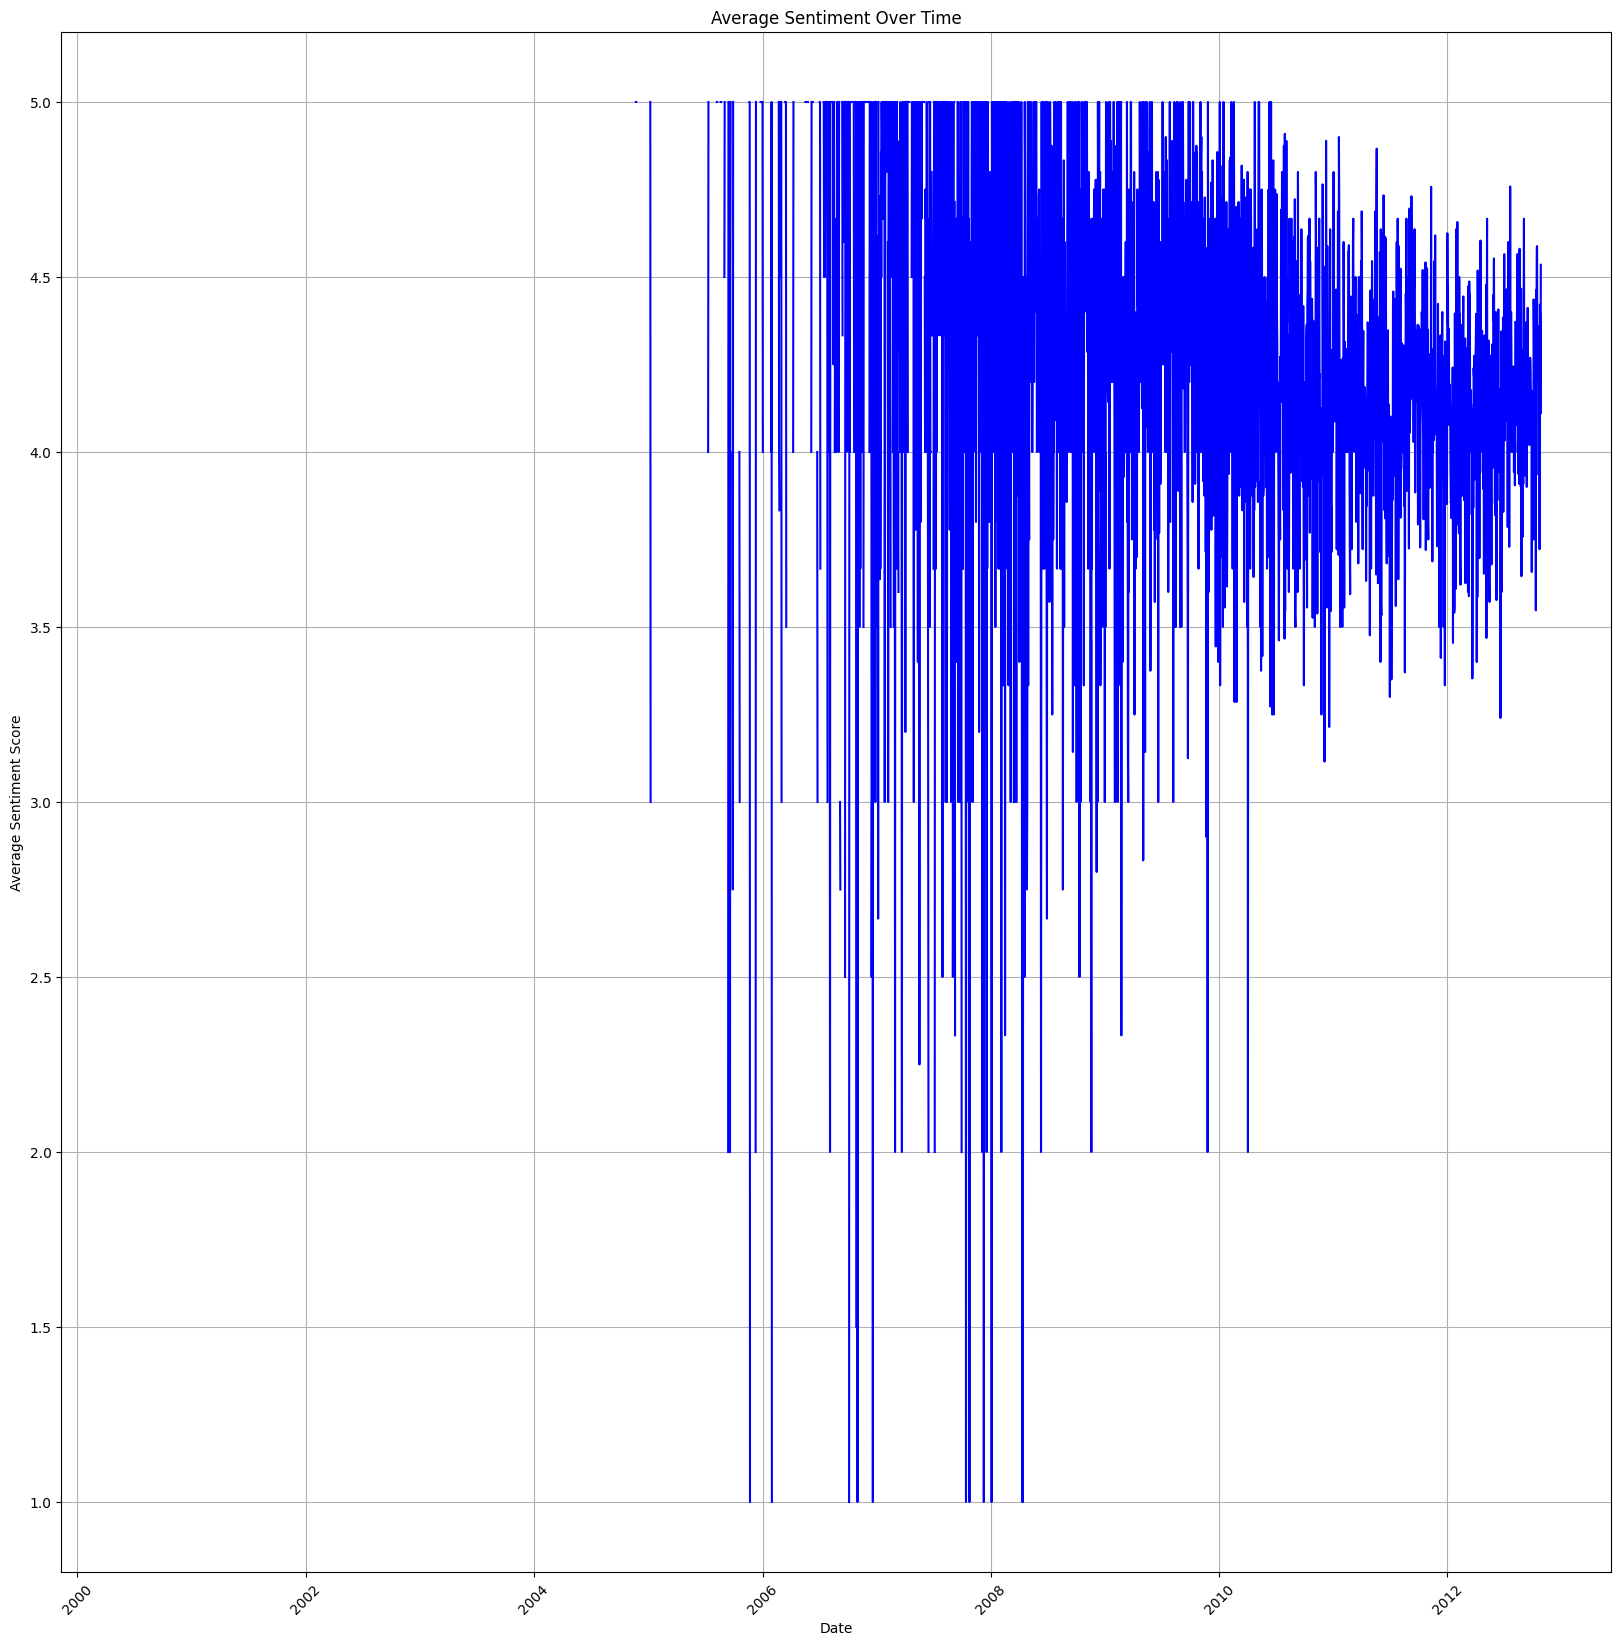

In [269]:
sampled_df['Time'] = pd.to_datetime(sampled_df['Time'], unit = 's')

sampled_df['Date'] = sampled_df['Time'].dt.date

average_sentiment = sampled_df.groupby('Date')['Score'].mean()

average_sentiment.index = pd.to_datetime(average_sentiment.index)
average_sentiment_daily = average_sentiment.resample('D').mean()

plt.figure(figsize=(20,20 ))
plt.plot(average_sentiment_daily.index, average_sentiment_daily.values, color='blue', label = 'Average Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

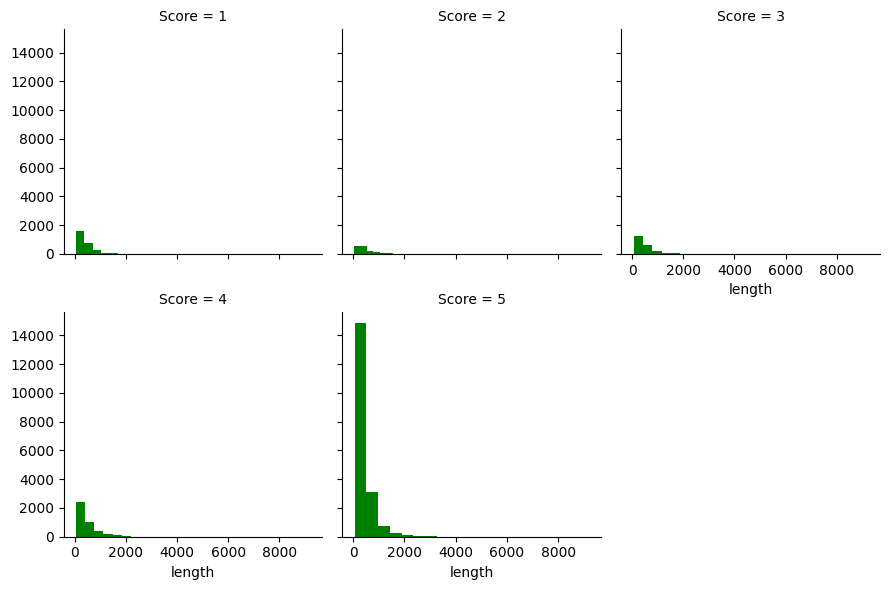

In [202]:
g = sns.FacetGrid(data = sampled_df, col = 'Score', col_wrap = 3)
g.map(plt.hist, 'length', bins = 20, color = 'green')

In [203]:
sampled_df.length.describe()

count    29998.000000
mean       431.802920
std        429.928558
min         33.000000
25%        179.000000
50%        303.000000
75%        524.750000
max       9226.000000
Name: length, dtype: float64

<Axes: xlabel='count', ylabel='Score'>

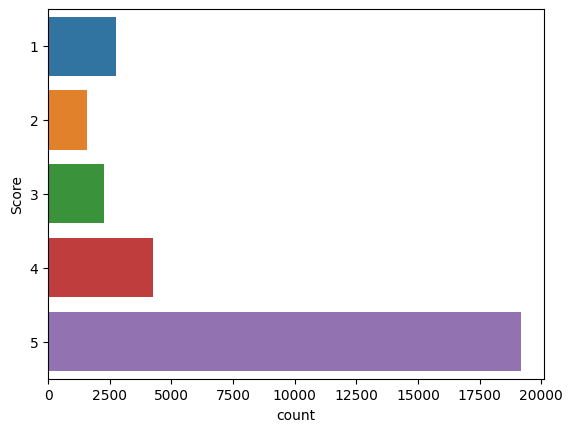

In [204]:
sns.countplot(y = 'Score', data = sampled_df)

In [206]:
sampled_df_5 = sampled_df[sampled_df['Score'] == 5]

In [205]:
sampled_df_1 = sampled_df[ sampled_df['Score'] == 1 ]

In [207]:
sampled_df_15 = pd.concat([sampled_df_1, sampled_df_5])

In [208]:
print('% of 5 star reviews ', len(sampled_df_5)/len(sampled_df_15)*100, '%')

% of 5 star reviews  87.41845718717212 %


In [209]:
print('% of 1 star reviews in updated sampled_df ', len(sampled_df_1)/len(sampled_df_15)*100, '%')

% of 1 star reviews in updated sampled_df  12.58154281282788 %


# Prepping the data for modelling

In [270]:
def clean_message(msg):
    removed = [char  for char in msg if char not in string.punctuation]
    removed_join = ''.join(punc_removed)
    removed_join_clean = [word  for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return removed_join_clean

In [211]:
clean_msg = sampled_df_15['Text'].apply(clean_message)

In [213]:
print(clean_msg[0])

['Delicious', 'also', 'Keurig', 'machine', 'much', 'coffe', 'tea', 'really', 'good', 'chocolate', 'mixes', 'watery', 'first', 'real', 'hot', 'chocolate', 'get', 'machine', 'uses', 'pods', 'Try', 'youll', 'love', 'Great', 'Holiday', 'gift']


In [214]:
sampled_df_15.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,length
count,21921.000000,21921.000000,21921.000000,21921.000000,21921.000000
mean,285275.678847,1.738196,2.171114,4.496738,407.134483
std,163641.862563,6.549073,7.309244,1.326595,412.427051
min,37.000000,0.000000,0.000000,1.000000,53.000000
25%,144510.000000,0.000000,0.000000,5.000000,173.000000
50%,286056.000000,0.000000,1.000000,5.000000,285.000000
75%,427153.000000,2.000000,2.000000,5.000000,489.000000
max,568422.000000,472.000000,477.000000,5.000000,9226.000000


# Now, to vectorise the reviews, and test the classifier

In [215]:
#Now, to vectorise the reviews

vectoriser = CountVectorizer(analyzer = clean_message)

review_vectoriser = vectoriser.fit_transform(sampled_df_15['Text'])


In [216]:
#Now to train

classifier = MultinomialNB()

label = sampled_df_15['Score'].values



In [217]:
classifier.fit(review_vectoriser, label) #input + output

MultinomialNB()

In [271]:
#Testing the classifier

testing_sample = ['amazing food highly recommend']
#testing_sample = ['Terrible not worth the price']


testing_sample_countvectoriser = vectoriser.transform(testing_sample)
prediction_test = classifier.predict(testing_sample_countvectoriser)

prediction_test
                                                     

array([5])

In [219]:
X = review_vectoriser
y = label

In [220]:
test_size_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

cross_val_accuracies = []

for test_size in test_size_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    classifier = MultinomialNB()

    cross_val_accuracy = np.mean(cross_val_score(classifier, X_train, y_train, cv=5))

    cross_val_accuracies.append(cross_val_accuracy)

best_test_size = test_size_values[np.argmax(cross_val_accuracies)]

print("Cross-validation accuracies:", cross_val_accuracies)
print("Best test_size:", best_test_size)

Cross-validation accuracies: [0.9047040625118441, 0.900547479726977, 0.8964413661789278, 0.8918034028322733, 0.8873175182481752, 0.8794476450535035, 0.8745440151628971, 0.8702084732613777, 0.8695249685357963]
Best test_size: 0.1


# Train/Test Split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = best_test_size)

# Sentiment Analysis Using Naive Bayes

In [222]:
classifier = MultinomialNB()

classifier.fit(X_train, y_train)


MultinomialNB()

In [223]:
#Now it's time to evaluate the model

In [224]:
y_predict_train = classifier.predict(X_train)

In [226]:
cm = confusion_matrix(y_train, y_predict_train)

<Axes: >

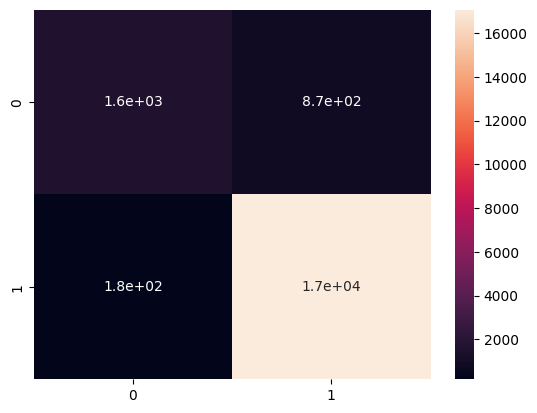

In [227]:
sns.heatmap(cm, annot = True)

In [228]:
y_predict_test = classifier.predict(X_test)

In [229]:
cm2 = confusion_matrix(y_test, y_predict_test)

<Axes: >

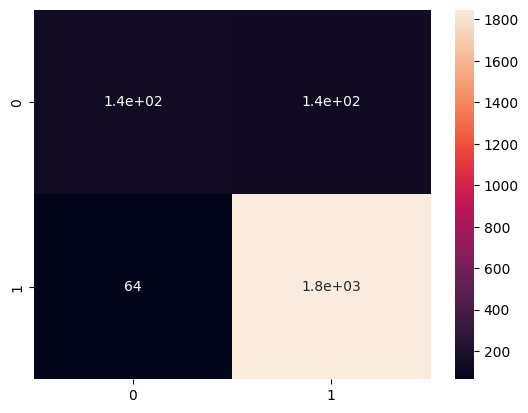

In [230]:
sns.heatmap(cm2, annot = True)

In [231]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.69      0.51      0.59       282
           5       0.93      0.97      0.95      1911

    accuracy                           0.91      2193
   macro avg       0.81      0.74      0.77      2193
weighted avg       0.90      0.91      0.90      2193



# Now, to try hyperparameter tuning to see if any significant difference occurs.

In [232]:
param_grid = {
    
    'alpha' : [0.1, 0.5, 1.0, 2.0],
    
}

In [233]:
from sklearn.model_selection import GridSearchCV

classifier2 = MultinomialNB()

grid_search = GridSearchCV(classifier2, param_grid, scoring = 'f1', cv = 5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_alpha = grid_search.best_params_['alpha']

In [234]:
best_classifier = MultinomialNB(alpha = best_params['alpha'])
best_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [235]:
y_predict_train2 = best_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train2)

y_predict_test2 = best_classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test2)


              precision    recall  f1-score   support

           1       0.90      0.65      0.75      2476
           5       0.95      0.99      0.97     17252

    accuracy                           0.95     19728
   macro avg       0.93      0.82      0.86     19728
weighted avg       0.94      0.95      0.94     19728



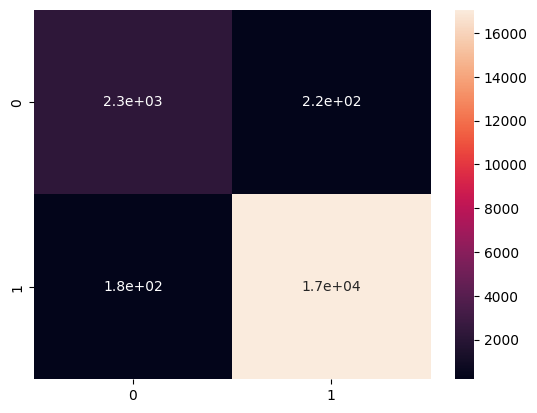

In [236]:
sns.heatmap(cm, annot = True)
print(classification_report(y_train, y_predict_train))

<Axes: >

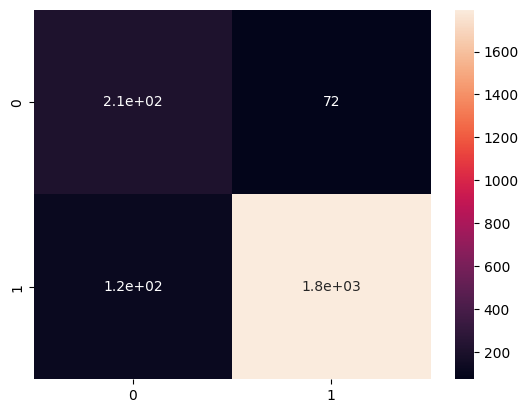

In [237]:
sns.heatmap(cm2, annot = True)

In [238]:
print(classification_report(y_test, y_predict_test2))

              precision    recall  f1-score   support

           1       0.64      0.74      0.69       282
           5       0.96      0.94      0.95      1911

    accuracy                           0.91      2193
   macro avg       0.80      0.84      0.82      2193
weighted avg       0.92      0.91      0.92      2193



# Graphical Evaluation Before and After Hypertuning.

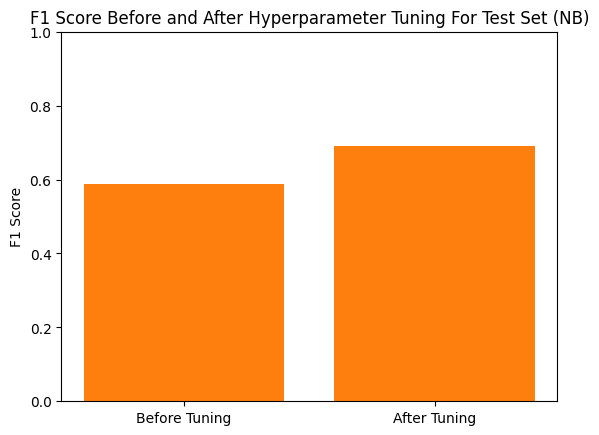

In [239]:
original_f1_score_1 = f1_score(y_test, y_predict_test)
new_f1_score_1 = f1_score(y_test, y_predict_test2)

labels = ['Before Tuning', 'After Tuning']

f1_scores_nb = [original_f1_score_1, new_f1_score_1]

plt.bar(labels, f1_scores_nb)
plt.bar(labels, f1_scores_nb)
plt.ylim(0, 1.0)
plt.ylabel('F1 Score')
plt.title('F1 Score Before and After Hyperparameter Tuning For Test Set (NB)')
plt.show()

# Sentiment Analysis with Linear SVM

In [240]:
svm_classifier = SVC(kernel = 'linear', C = 1)

In [241]:
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [242]:
y_predict_test_svm = svm_classifier.predict(X_test)

y_predict_train_svm = svm_classifier.predict(X_train)

<Axes: >

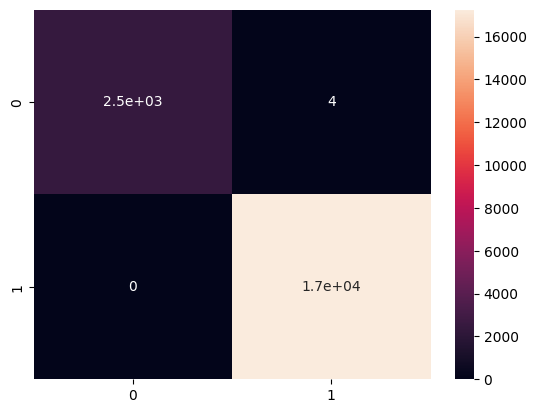

In [243]:
# Confusion matrix 1
cm_svm_train = confusion_matrix(y_train, y_predict_train_svm)
sns.heatmap(cm_svm_train, annot = True)

<Axes: >

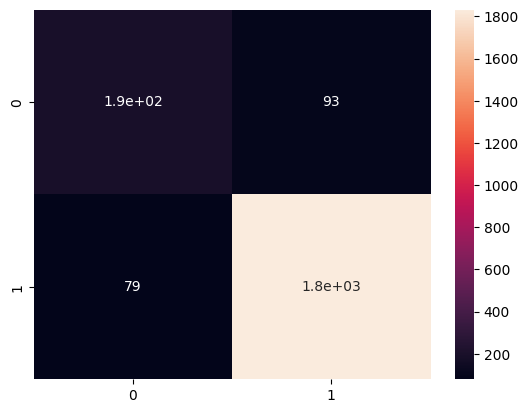

In [244]:
# Confusion matrix 2
cm_svm_test = confusion_matrix(y_test, y_predict_test_svm)
sns.heatmap(cm_svm_test, annot = True)

In [245]:
print("Classification Report Train:")
print(classification_report(y_train, y_predict_train_svm))

Classification Report Train:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2476
           5       1.00      1.00      1.00     17252

    accuracy                           1.00     19728
   macro avg       1.00      1.00      1.00     19728
weighted avg       1.00      1.00      1.00     19728



In [246]:
print("Classification Report Test:")
print(classification_report(y_test, y_predict_test_svm))

Classification Report Test:
              precision    recall  f1-score   support

           1       0.71      0.67      0.69       282
           5       0.95      0.96      0.96      1911

    accuracy                           0.92      2193
   macro avg       0.83      0.81      0.82      2193
weighted avg       0.92      0.92      0.92      2193



# Now, with hyperparameter tuning

Note, it was important to tune the hyperparameters here on a smaller 
sub-sample, simply because it was taking too long when I tried tuning
on the orginal sub-sample of 22k records on the df_15 set.

In [247]:
class_proportions = df['Score'].value_counts(normalize=True)
desired_size = 6000

new_sampled_df = pd.DataFrame()

for label, proportion in class_proportions.items():
    num_samples = int(desired_size * proportion)
    
    sampled_class_data = df[df['Score'] == label].sample(n=num_samples, random_state=42)
    
    new_sampled_df = new_sampled_df.append(sampled_class_data)

new_sampled_df.reset_index(drop=True, inplace=True)

/var/folders/0g/j3sm95ts7s3ghzdq9pv50qhr0000gn/T/ipykernel_9689/3454435268.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sampled_df = new_sampled_df.append(sampled_class_data)
/var/folders/0g/j3sm95ts7s3ghzdq9pv50qhr0000gn/T/ipykernel_9689/3454435268.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sampled_df = new_sampled_df.append(sampled_class_data)
/var/folders/0g/j3sm95ts7s3ghzdq9pv50qhr0000gn/T/ipykernel_9689/3454435268.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sampled_df = new_sampled_df.append(sampled_class_data)
/var/folders/0g/j3sm95ts7s3ghzdq9pv50qhr0000gn/T/ipykernel_9689/3454435268.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In [248]:
new_sampled_df['Text'] = new_sampled_df['Text'].fillna('')


new_sampled_df_1 = new_sampled_df[ new_sampled_df['Score'] == 1 ]
new_sampled_df_5 = new_sampled_df[ new_sampled_df['Score'] == 5 ]

new_sampled_df_15 = pd.concat([new_sampled_df_1, new_sampled_df_5])

In [249]:
clean_msg = new_sampled_df_15['Text'].apply(clean_message)

In [250]:
vectoriser2 = CountVectorizer(analyzer = clean_message)

review_vectoriser2 = vectoriser2.fit_transform(new_sampled_df_15['Text'])

In [251]:
label = new_sampled_df_15['Score'].values


X2 = review_vectoriser2
y2 = label

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.1)

In [252]:
param_grid = {
    
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf']
}

In [253]:
svm_classifier2 = SVC()

In [254]:
grid_search_svm = GridSearchCV(svm_classifier2, param_grid, scoring='f1', cv=5)
grid_search_svm.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [255]:
best_params_svm = grid_search_svm.best_params_

In [256]:
best_classifier_svm = SVC(kernel=best_params_svm['kernel'], C=best_params_svm['C'])
best_classifier_svm.fit(X_train2, y_train2)

SVC(C=1, kernel='linear')

Best hyperparameters for SVM: {'C': 1, 'kernel': 'linear'}
Classification Report after tuning:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       490
           5       1.00      1.00      1.00      3454

    accuracy                           1.00      3944
   macro avg       1.00      1.00      1.00      3944
weighted avg       1.00      1.00      1.00      3944



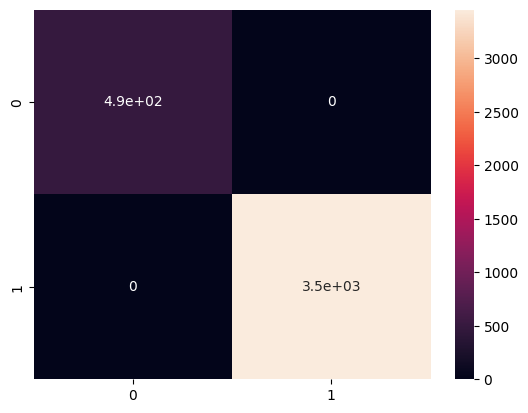

In [257]:
y_predict_train2_svm = best_classifier_svm.predict(X_train2)
cm_svm_train = confusion_matrix(y_train2, y_predict_train2_svm)

sns.heatmap(cm_svm_train, annot = True)

print("Best hyperparameters for SVM:", best_params_svm)
print("Classification Report after tuning:")
print(classification_report(y_train2, y_predict_train2_svm))

<Axes: >

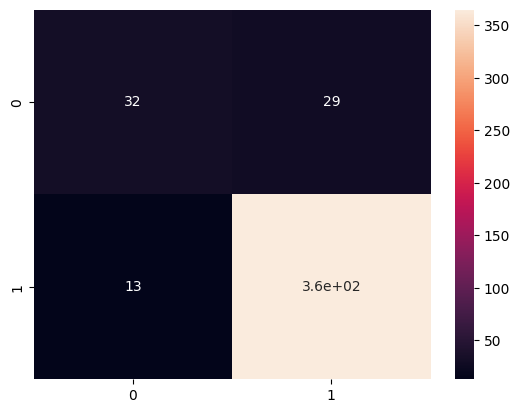

In [258]:
y_predict_test2_svm = best_classifier_svm.predict(X_test2)
cm_svm2 = confusion_matrix(y_test2, y_predict_test2_svm)

sns.heatmap(cm_svm2, annot = True)

In [259]:
print("Best hyperparameters for SVM:", best_params_svm)
print("Classification Report after tuning:")
print(classification_report(y_test2, y_predict_test2_svm))

Best hyperparameters for SVM: {'C': 1, 'kernel': 'linear'}
Classification Report after tuning:
              precision    recall  f1-score   support

           1       0.71      0.52      0.60        61
           5       0.93      0.97      0.95       378

    accuracy                           0.90       439
   macro avg       0.82      0.75      0.77       439
weighted avg       0.90      0.90      0.90       439



# Before and After Tuning For SVM

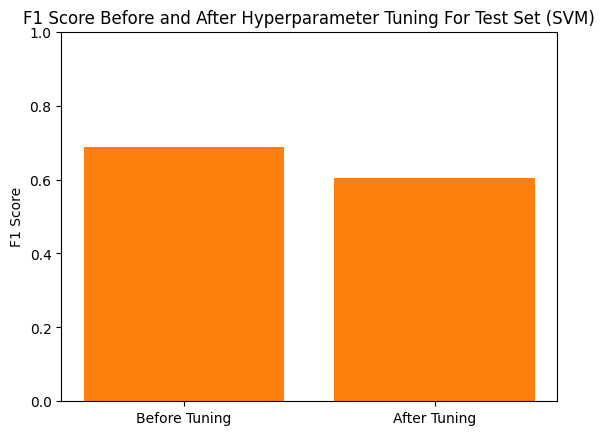

In [260]:
original_f1_score_svm = f1_score(y_test, y_predict_test_svm)

new_f1_score_svm = f1_score(y_test2, y_predict_test2_svm)

labels = ['Before Tuning', 'After Tuning']

f1_scores_svm = [original_f1_score_svm, new_f1_score_svm]

plt.bar(labels, f1_scores_svm)
plt.bar(labels, f1_scores_svm)
plt.ylim(0, 1.0)
plt.ylabel('F1 Score')
plt.title('F1 Score Before and After Hyperparameter Tuning For Test Set (SVM)')
plt.show()

# Overall View of Both Methods Before and After Hyperparameter Tuning

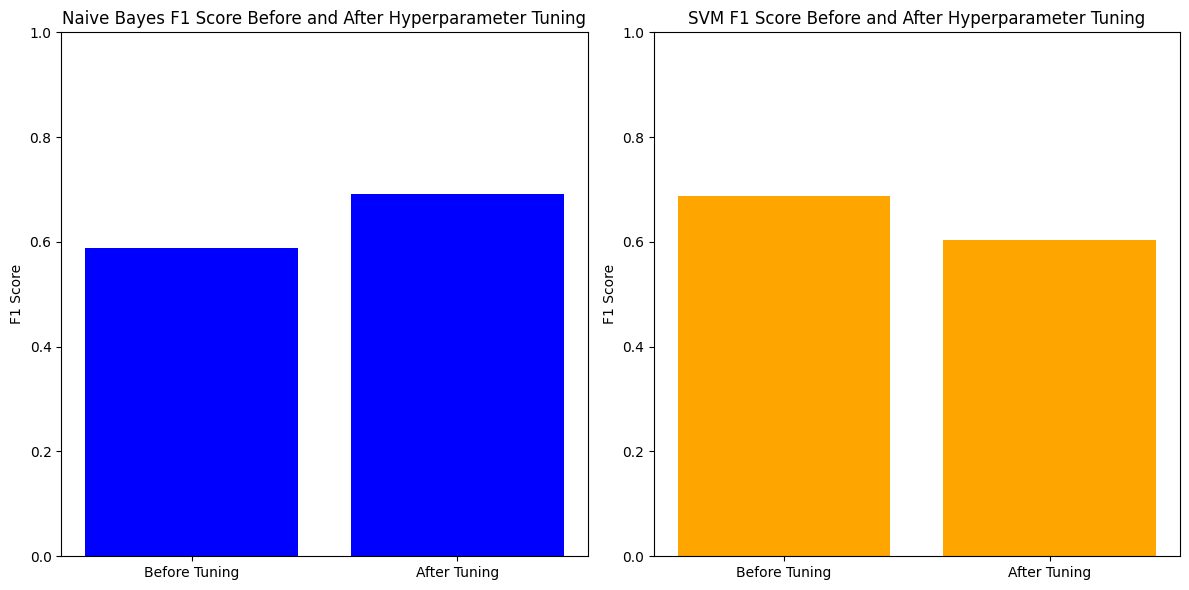

In [266]:
labels = ['Before Tuning', 'After Tuning']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(labels, f1_scores_nb, color='blue')
plt.ylim(0, 1.0)
plt.ylabel('F1 Score')
plt.title('Naive Bayes F1 Score Before and After Hyperparameter Tuning')

plt.subplot(1, 2, 2)
plt.bar(labels, f1_scores_svm, color='orange')
plt.ylim(0, 1.0)
plt.ylabel('F1 Score')
plt.title('SVM F1 Score Before and After Hyperparameter Tuning')

plt.tight_layout()

plt.show()